['CNT_13_12_1.696.log.lammps', 'CNT_14_11_1.699.log.lammps', 'CNT_15_8_1.584.log.lammps', 'CNT_25_14_2.679.log.lammps', 'CNT_16_14_2.036.log.lammps']
CNT_13_12_1.696.log.lammps
<class 'list'>
2
(7949, 14)
[[1.0000000e+02 2.9940464e+02 5.0000000e-05 ... 2.6496143e+06
  1.7444841e+01 5.0769769e+04]
 [2.0000000e+02 2.9553780e+02 1.0000000e-04 ... 2.6487900e+06
  1.7497259e+01 5.0924868e+04]
 [3.0000000e+02 2.9474755e+02 1.5000000e-04 ... 2.6503542e+06
  1.7489869e+01 5.0905903e+04]
 ...
 [7.9470000e+05 3.0098446e+02 3.9735000e-01 ... 1.4546290e+05
  1.9812088e+01 8.0567742e+04]
 [7.9480000e+05 3.0073056e+02 3.9740000e-01 ... 1.4529539e+05
  1.9702323e+01 8.0124240e+04]
 [7.9490000e+05 3.0208061e+02 3.9745000e-01 ... 1.4510039e+05
  1.9832637e+01 8.0657079e+04]]


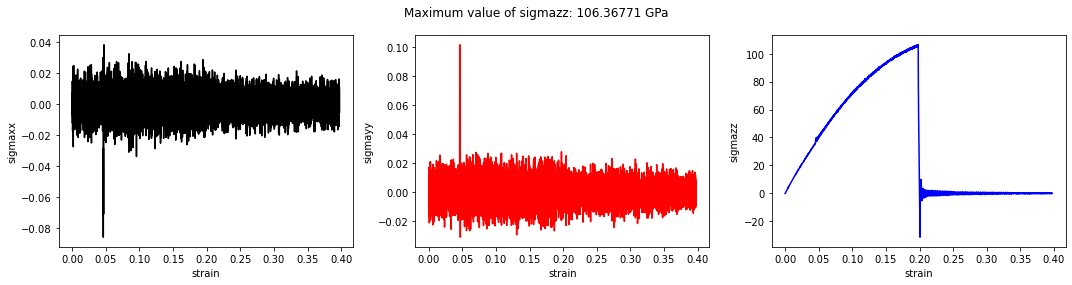

CNT_14_11_1.699.log.lammps
<class 'list'>
2
(8067, 14)
[[1.0000000e+02 3.0330492e+02 5.0000000e-05 ... 2.6587091e+06
  1.7510889e+01 5.1073493e+04]
 [2.0000000e+02 3.0043946e+02 1.0000000e-04 ... 2.6565711e+06
  1.7393485e+01 5.0733600e+04]
 [3.0000000e+02 2.9588358e+02 1.5000000e-04 ... 2.6497543e+06
  1.7394164e+01 5.0738118e+04]
 ...
 [8.0650000e+05 3.0236741e+02 4.0325000e-01 ... 1.4528783e+05
  1.9858655e+01 8.1275551e+04]
 [8.0660000e+05 3.0068009e+02 4.0330000e-01 ... 1.4514036e+05
  1.9927480e+01 8.1560136e+04]
 [8.0670000e+05 2.9958519e+02 4.0335000e-01 ... 1.4506321e+05
  1.9982478e+01 8.1788149e+04]]


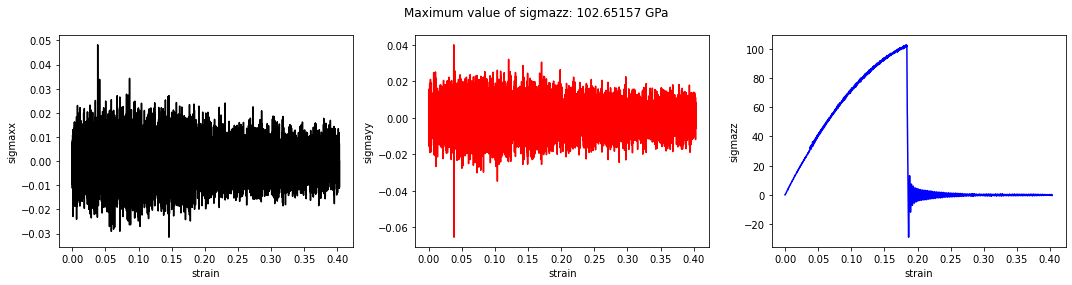

In [1]:
# CREDIT: Megan McCarthy & Drew Rohskopf
# COMPILED: Brandon Ma

## This program reads from a local directory and selects files that has log.lammps extension and
## checks if a certain column exists before generating the data after said column is confirmed to exist
## before converting it to .csv along with the file stem taken from the file's name without having to do it manually.

import os, sys
import numpy as np
import matplotlib.pyplot as plt

all_the_log_files = [f for f in os.listdir() if f.endswith('.lammps') and not os.path.isdir(f)]
print(all_the_log_files)

## These ones do what we want.
working_logs = all_the_log_files[:1] + all_the_log_files[-2:]

## bad logs are all the others
bad_logs = [log for log in all_the_log_files if log not in working_logs]

test_logs = ['CNT_13_12_1.696.log.lammps', 'CNT_14_11_1.699.log.lammps',]

store_numpy_arrays = []

# for i, log_file in enumerate(all_the_log_files):
for i, log_file in enumerate(test_logs):
    print(log_file)
    file_stem = log_file.replace('.log.lammps','')

    ## Get the text from the log file
    with open(log_file, 'r') as f:
        txt = f.readlines()

    col_check_str = 'Step          Temp         v_strain      v_sigmaxx      v_sigmayy'
    end_check_str = 'Loop time of '
    columns = None
    start_idx, end_idx = 0, len(txt)

    for line_idx, line in enumerate(txt):
        if col_check_str in line:
            columns = line.strip().split()
            start_idx = line_idx + 1
        if end_check_str in line and columns:
            end_idx = line_idx - 1

    ## PRINT DEBUG
    # print(columns)
    # print(start_idx,end_idx)
    # print(data0[-1:])

    data0 = txt[start_idx:end_idx]
    data = [row for row in data0 if len(row.split()) == 14]
    columns_entry = None
        
    ## write the CSV file
    csv_name = f'{file_stem}.csv'
    with open(csv_name, 'w') as f:
        f.write(",".join(columns) + "\n")
        for start_idx in data:
            ## Check if the rows has all the columns. If it is missing all 14 columns, remove the entire row.
            ## Suggested by Drew Rohskopf
            columns_entry = start_idx.strip().split()
            line_length = len(columns_entry)
            if (line_length==14):
                f.write(",".join(columns_entry) + "\n")
    
    ## Create an array to store each elements in a column
    arr = np.array([[float(element) for element in row.split()] for row in data])
    store_numpy_arrays.append(arr)
    
    
    ### DEBUG type
    print(type(store_numpy_arrays))
    
    ssc = arr.copy()
        
    #ssc = store_numpy_arrays[i] ## stress strain curve array
    
    ### DEBUG shape
    my_shape = len(ssc.shape)
    print(my_shape)
    print(np.shape(ssc))
    print(ssc)
    
    
    ## Takes the columns into the variables
    col_strain = ssc[:,2]
    col_sigmaxx = ssc[:,3] 
    col_sigmayy = ssc[:,4] 
    col_sigmazz = ssc[:,5] 
    
#     ## Print the columns entries for debugging purposes
#     print(col_strain)
#     print(col_sigmaxx)
#     print(col_sigmayy)
#     print(col_sigmazz)

    ## One row, three columns of graphs 
    fig, axes = plt.subplots(1, 3, figsize = [15,4])
        
    axes[0].plot(col_strain, col_sigmaxx,label="sigma_xx",c="k")
    axes[0].set_xlabel('strain')
    axes[0].set_ylabel('sigmaxx')

    axes[1].plot(col_strain, col_sigmayy,label="sigma_yy",c="r")
    axes[1].set_xlabel('strain')
    axes[1].set_ylabel('sigmayy')

    axes[2].plot(col_strain, col_sigmazz,label="sigma_zz",c="b")
    axes[2].set_xlabel('strain')
    axes[2].set_ylabel('sigmazz')
        
    ## Find the max stress fracture and append it to the title for references
    max_sigmazz = np.max(col_sigmazz)
    fig_info = f"Maximum value of sigmazz: {max_sigmazz} GPa"

    fig.suptitle(fig_info)

    ## Create a PNG of the graphs and save it
    png_name = f'{file_stem}_StressStrain.png'
    fig.tight_layout()
    plt.savefig(png_name, transparent=True)

    ## Fit the graphs layout, then show and close. Required for normal scripts
    plt.show()
    plt.close()
    